In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Depth 6

In [2]:
scan_results_files = [
    '2023-06-18_18-09-23_results.json',
    '2023-06-18_18-24-20_results.json',
    '2023-06-19_00-25-36_results.json',
    '2023-06-19_15-04-48_results.json',
]

In [3]:
d6_results = []
for filename in scan_results_files:
    with open(f'../results/{filename}') as f:
        data = json.load(f)
        
        configs = data[0]['configs']
        if configs['depth'] == 6:
            d6_results.append(data)
        else:
            continue
            # print to d7 results

In [4]:
best_mapes = {
    'OBJ1': 0.0097,
    'OBJ2': 0.018,
    'OBJ3': 0.013,
    'OBJ4': 0.058,
    'OBJ5': 0.041,
    'OBJ6': 0.040,
}

In [5]:
def learning_rate_to_xval(learning_rate):
    learning_rate = round(learning_rate, 4)
    if learning_rate == 0.001:
        return -1
    elif learning_rate == 0.003:
        return -0.33
    elif learning_rate == 0.005:
        return 0.333
    elif learning_rate == 0.01:
        return 1
    
def learning_rate_to_color(learning_rate):
    learning_rate = round(learning_rate, 4)
    if learning_rate == 0.001:
        return 'r'
    elif learning_rate == 0.003:
        return 'orange'
    elif learning_rate == 0.005:
        return 'g'
    elif learning_rate == 0.01:
        return 'b'

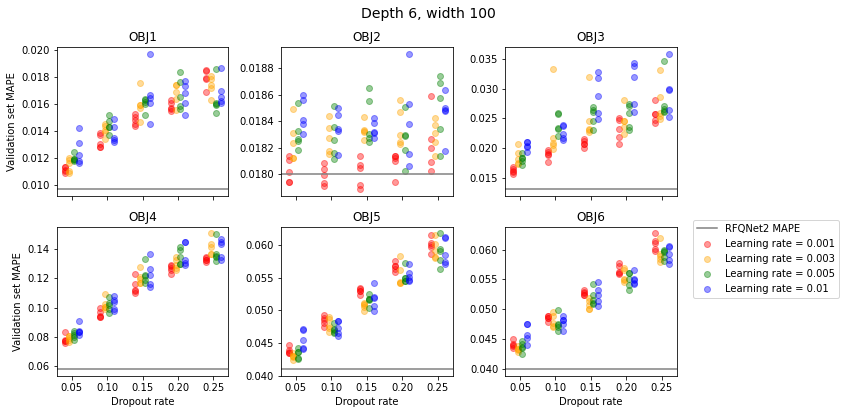

In [6]:
results_list = d6_results

fig, axs = plt.subplots(2, 3, figsize=(12, 6), sharex=True)

# fig.supylabel('Validation set MAPE')
for i in range(1, 7):
    ax = axs.flatten()[i-1]
    ax.axhline(best_mapes[f'OBJ{i}'], label=('RFQNet2 MAPE' if i == 1 else ''), color='gray')
    ax.set_title(f'OBJ{i}')
    ax.set_xlabel('Dropout rate' if i > 3 else '')
    ax.set_ylabel('Validation set MAPE' if i % 3 == 1 else '')
    # ax.set_yscale('log')
    #ax.set_ylim(0.0099, 0.5)

for res in results_list:
    for j, d in enumerate(res):
        configs = d['configs']
        results = d['results']
        dropout_rate = configs['dropout_rate']
        learning_rate = configs['learning_rate']
        
        for i in range(1, 7):
            ax = axs.flatten()[i-1]

            obj_results = results['by_response'][f'OBJ{i}']
            mape_val = obj_results['mape_val']

            ax.scatter(
                [dropout_rate + learning_rate_to_xval(learning_rate)*0.01]*5,
                mape_val, color=learning_rate_to_color(learning_rate), alpha=0.4, 
                label=(f'Learning rate = {round(learning_rate, 4)}' if (j == 0 and i == 1) else ''))

fig.tight_layout(rect=[0, 0.03, 0.8, .95])
fig.suptitle(f"Depth 6, width 100", fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(.8, 0.5))


plt.savefig('../img/dropout_results_d6.png', dpi=500)
plt.show()

In [7]:
4 // 3

1

## Depth 7

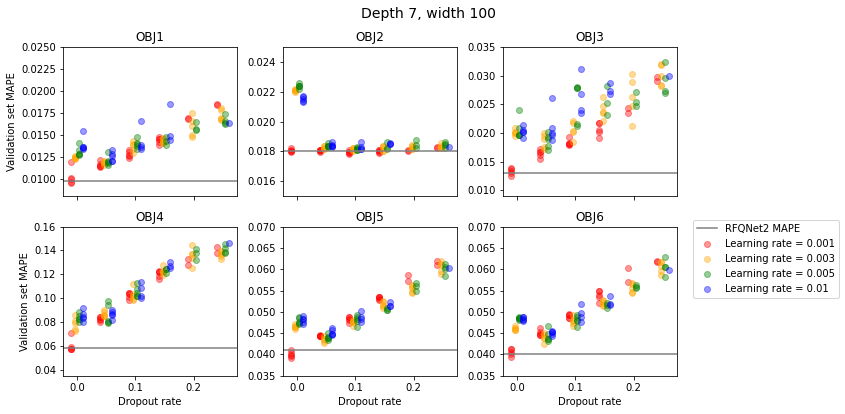

In [20]:
scan_results_files = [
    '2023-06-19_02-49-35_results.json',
    '2023-06-19_08-31-59_results.json',
    '2023-06-19_11-07-34_results.json',
    '2023-06-19_19-38-21_results.json'
]

d7_results = []
for filename in scan_results_files:
    with open(f'../results/{filename}') as f:
        data = json.load(f)
        
        configs = data[0]['configs']
        if configs['depth'] == 6:
            d6_results.append(data)
        else:
            d7_results.append(data)
            
results_list = d7_results

fig, axs = plt.subplots(2, 3, figsize=(12, 6), sharex=True)

ylimits = {
    "OBJ1": (0.008, 0.025),
    "OBJ2": (0.015, 0.025),
    "OBJ3": (0.009, 0.035),
    "OBJ4": (0.035, 0.16),
    "OBJ5": (0.035, 0.07),
    "OBJ6": (0.035, 0.07)
}

# fig.supylabel('Validation set MAPE')
for i in range(1, 7):
    ax = axs.flatten()[i-1]
    ax.axhline(best_mapes[f'OBJ{i}'], label=('RFQNet2 MAPE' if i == 1 else ''), color='gray')
    ax.set_title(f'OBJ{i}')
    ax.set_xlabel('Dropout rate' if i > 3 else '')
    ax.set_ylabel('Validation set MAPE' if i % 3 == 1 else '')
    ax.set_ylim(*ylimits[f"OBJ{i}"])

for res in results_list:
    for j, d in enumerate(res):
        configs = d['configs']
        results = d['results']
        dropout_rate = configs['dropout_rate']
        learning_rate = configs['learning_rate']
        
        for i in range(1, 7):
            ax = axs.flatten()[i-1]

            obj_results = results['by_response'][f'OBJ{i}']
            mape_val = obj_results['mape_val']

            ax.scatter(
                [dropout_rate + learning_rate_to_xval(learning_rate)*0.01]*5,
                mape_val, color=learning_rate_to_color(learning_rate), alpha=0.4, 
                label=(f'Learning rate = {round(learning_rate, 4)}' if (j == 0 and i == 1) else ''))

fig.tight_layout(rect=[0, 0.03, 0.8, .95])
fig.suptitle(f"Depth 7, width 100", fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(.8, 0.5))


plt.savefig('../img/dropout_results_d7.png', dpi=500)
plt.show()